In [104]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras.layers import Input,Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras.layers.normalization import BatchNormalization
from keras.models import Model
from keras.optimizers import RMSprop

def load_data(no_of_images):
    
    img_size = (256,256)
    imgs_source = []
    imgs_target = []
    
    dir_source = "source"
    dir_target = "target"
    
    i = 0
    for _, _, filenames in os.walk('source/'):
        for filename in filenames:
            i = i+1
            if(i > no_of_images):
                break
            img_source = cv2.imread(os.path.join(dir_source,filename),cv2.IMREAD_GRAYSCALE)
            img_target = cv2.imread(os.path.join(dir_target, filename),cv2.IMREAD_GRAYSCALE)
            # resizing images
            img_source = cv2.resize(img_source,img_size)
            img_target = cv2.resize(img_target,img_size)
            # normalizing images
            img_source = np.array(img_source)/255
            img_target = np.array(img_target)/255
            
            imgs_source.append(img_source)
            imgs_target.append(img_target)
    return imgs_source, imgs_target

In [105]:
source,target=load_data(2)

In [106]:
print(source[0].shape)
print(target[0].shape)

(256, 256)
(256, 256)


In [107]:
img_rows = 256
img_cols = 256
img_channels = 1
img_shape = (img_rows, img_cols, img_channels)
source = np.array(source).reshape(-1, img_rows, img_cols, img_channels)
target = np.array(target).reshape(-1, img_rows, img_cols, img_channels)

source_train, source_test, target_train, target_test = train_test_split(source, target,
                                                                        test_size=0.5,
                                                                        random_state=1)

In [108]:
print(source_test.shape)
print(source_test[0].shape)

(1, 256, 256, 1)
(256, 256, 1)


In [109]:
import tensorflow as tf
autoencoder = tf.keras.models.load_model("./2000bs256.h5")

1
(256, 256, 1)


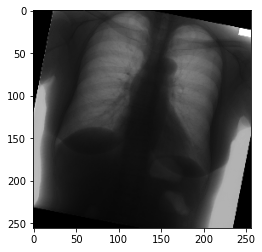

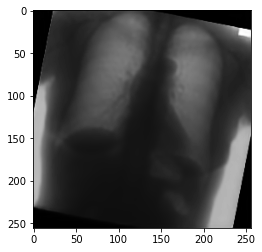

In [110]:
pred = autoencoder.predict(source_test)
print(len(pred))
print(pred[0].shape)
plt.imsave("hey.png",pred[0].reshape(256,256),cmap="gray")
plt.imshow(source_test[0].reshape(256,256),cmap="gray")
plt.show()
plt.imshow(pred[0].reshape(256,256),cmap="gray")
plt.show()